In [1]:
# Peliculas

#Fuente: https://www.kaggle.com/datasets/danielgrijalvas/movies/data

# Import de herramientas que usaremos
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

# Configuracion inicial para los graficos
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12, 6)

# Leer el archivo de datos
df = pd.read_csv(".\movies.csv")


In [2]:
# Primeras 5 filas de la tabla
df.head(5)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Identificamos con que tipo de datos vamos a trabajar
df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [4]:
# Revisar si hay valores nulos
df.isnull().mean()


name        0.000000
rating      0.010042
genre       0.000000
year        0.000000
released    0.000261
score       0.000391
votes       0.000391
director    0.000000
writer      0.000391
star        0.000130
country     0.000391
budget      0.283125
gross       0.024648
company     0.002217
runtime     0.000522
dtype: float64

In [5]:
# Preprocesamiento de datos
# Eliminar filas con valores nulos
df = df.dropna()

# Eliminar duplicados si los hay
df.drop_duplicates()

# Cambiar tipo de datos para votes, budget, gross y runtime de float a int (quitar .0, preferencia personal)
for i in range(len(df.columns)):
    if i in (6,11,12,14):   
        df[df.columns[i]] = df[df.columns[i]].astype("int64")

# En released solo nos intersa el año
df["released"] = df["released"].astype(str).str.extract(r"(\d{4})")
df["released"].astype("int64")

# Ordenar por gross de mayor a menor
df = df.sort_values(by=["gross"], inplace=False, ascending=False)


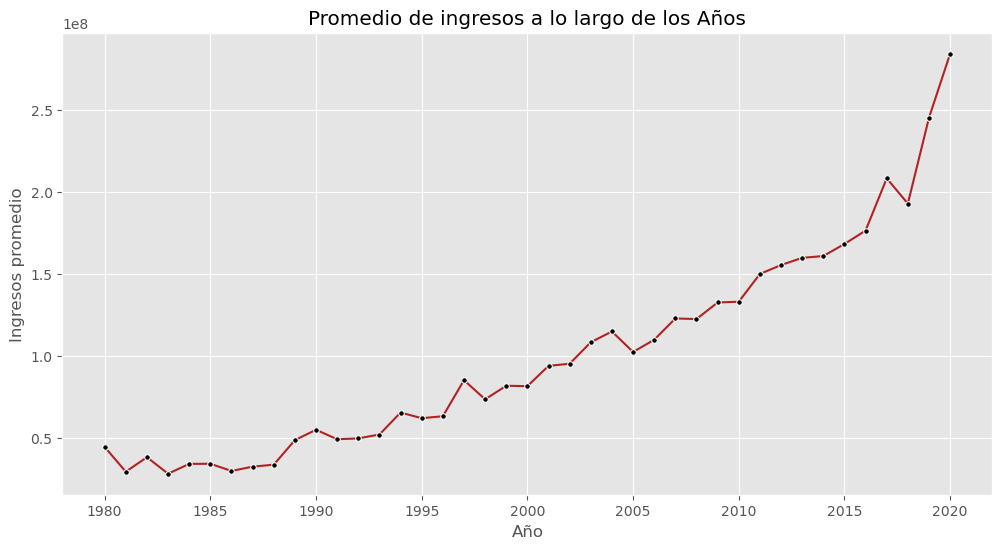

In [6]:
# Tendencia de ingresos brutos (gross) a lo largo de los años
sns.lineplot(x="year", y="gross", data=df, estimator="average", color="firebrick", marker="o", markersize=4, markerfacecolor="black", errorbar=None)
plt.title("Promedio de ingresos a lo largo de los Años")
plt.xlabel("Año")
plt.ylabel("Ingresos promedio")
plt.show()


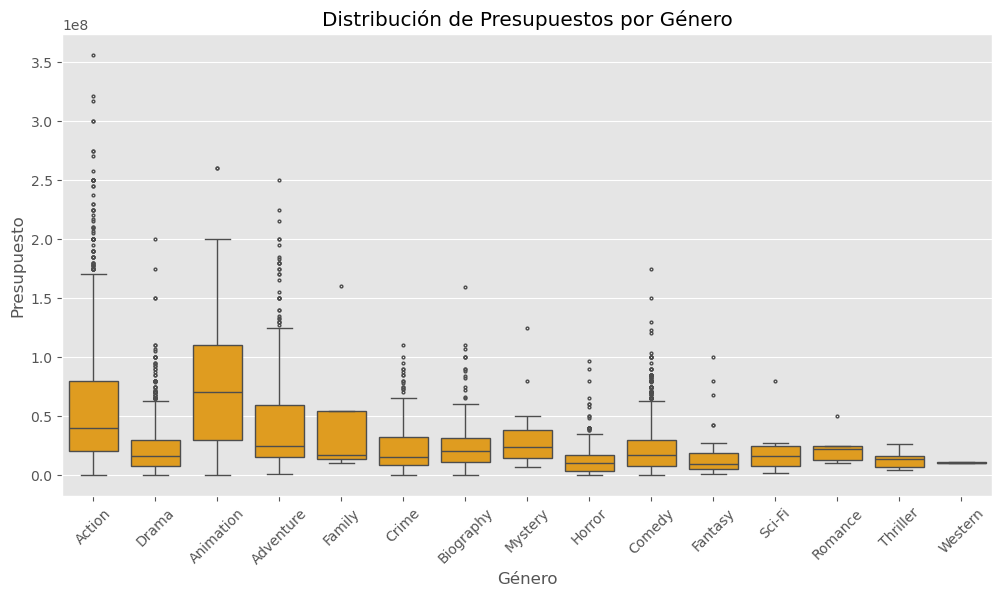

In [7]:
# Distribución de presupuestos (budget) por género (genre)
sns.boxplot(x="genre", y="budget", data=df, color="orange", fliersize=2)
plt.title("Distribución de Presupuestos por Género")
plt.xlabel("Género")
plt.ylabel("Presupuesto")
plt.xticks(rotation=45)
plt.show()


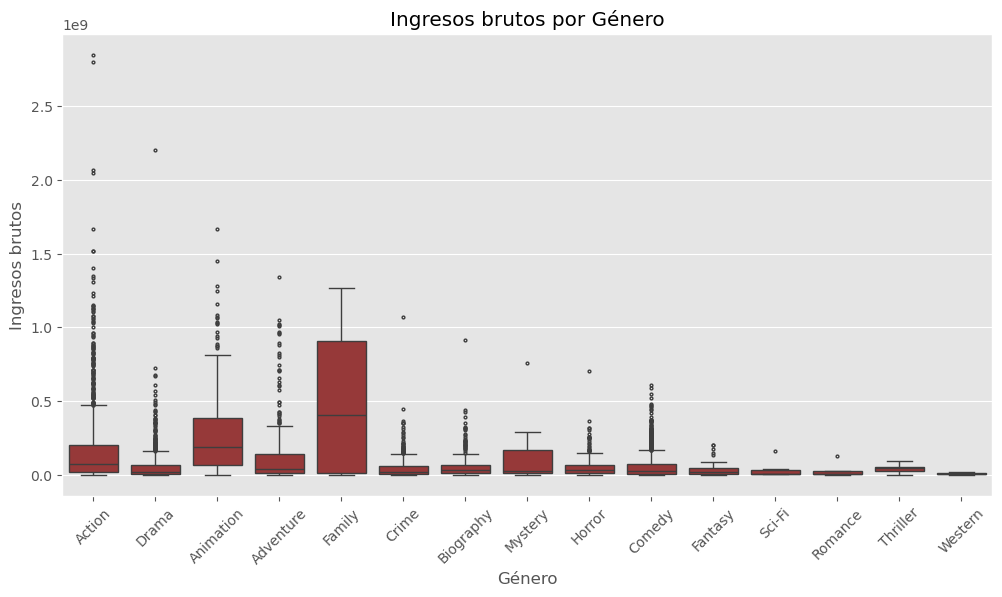

In [8]:
# Recaudación bruta (gross) por género (genre)
sns.boxplot(x="genre", y="gross", data=df, color="brown", fliersize=2)
plt.title("Ingresos brutos por Género")
plt.xlabel("Género")
plt.ylabel("Ingresos brutos")
plt.xticks(rotation=45)
plt.show()


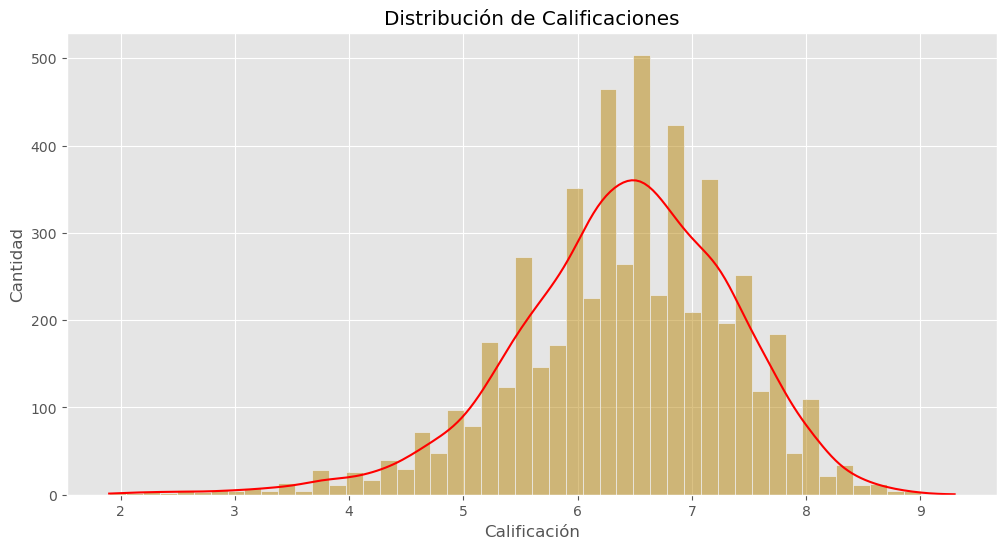

In [9]:
# Distribución de calificaciones (ratings)
hist = sns.histplot(df["score"], kde=True, color="darkgoldenrod", stat="count")
hist.lines[0].set_color("red")
plt.title("Distribución de Calificaciones")
plt.xlabel("Calificación")
plt.ylabel("Cantidad")
plt.show()


In [10]:
# Buscamos correlaciones entre los valores numericos
corr_matrix = df.corr(numeric_only=True)
corr_matrix


,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


Text(0.5, 1.0, 'Matriz de correlación para valores numéricos')

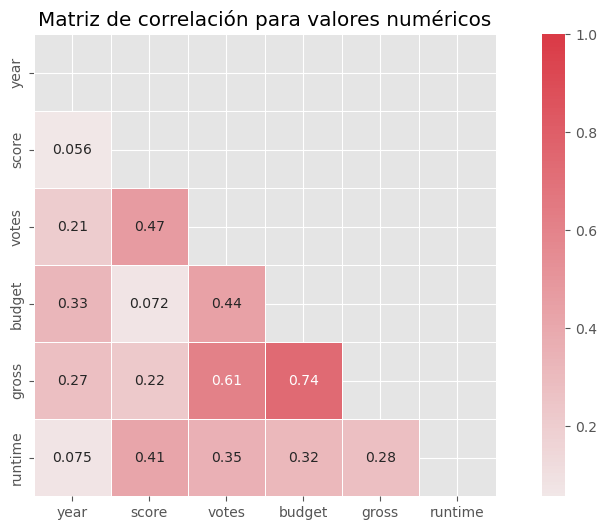

In [11]:
# Para visualizar mejor que valores tienen una alta correlacion se uso un mapa de calor
# Configuracion de mapa de calor, colores y solo una diagonal
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=cmap, mask=mask, vmax=1, center=0,
            square=True, linewidths=.5)
plt.title("Matriz de correlación para valores numéricos")


In [12]:
# Columnas que se correlacionan filtradas > 0.5 y < 1 (evitar redundancias)
corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs < 1)]
high_corr


gross   votes     0.614751
votes   gross     0.614751
budget  gross     0.740247
gross   budget    0.740247
dtype: float64

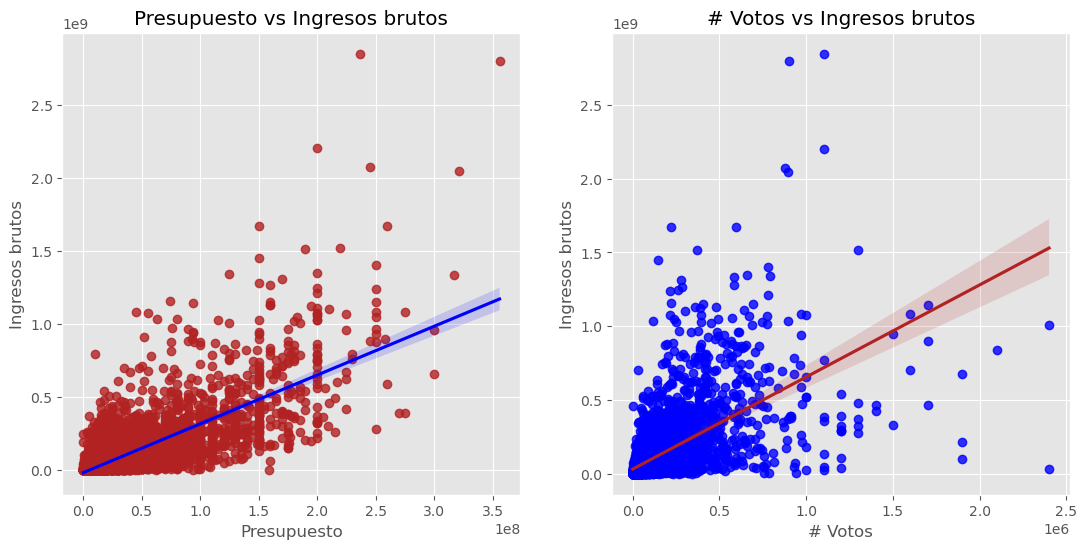

In [13]:
# El presupuesto tiene una correlacion con las ganancias
# Grafico de dispersion budget vs gross
# Con ayuda de seaborn trazamos una línea de regresión

# Crear dos subplots, uno al lado del otro
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))

# Gráfico 1: Presupuesto vs Ingresos brutos
sns.regplot(x="budget", y="gross", data=df, line_kws={"color": "blue"}, scatter_kws={"color": "firebrick"}, ax=ax1)
ax1.set_title("Presupuesto vs Ingresos brutos")
ax1.set_xlabel("Presupuesto")
ax1.set_ylabel("Ingresos brutos")

# Gráfico 2: # Votos IMDb vs Ingresos brutos
sns.regplot(x="votes", y="gross", data=df, line_kws={"color": "firebrick"}, scatter_kws={"color": "blue"}, ax=ax2)
ax2.set_title("# Votos vs Ingresos brutos")
ax2.set_xlabel("# Votos")
ax2.set_ylabel("Ingresos brutos")


# Mostrar los gráficos
plt.show()
